In [1]:
#import libraries
import pandas as pd
import openpyxl
import numpy as np 

%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv("D:\GIVA\orgdata.csv", encoding='unicode_escape')

In [3]:
df.head()

,ï»¿Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,1-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,2-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,3-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,4-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,5-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%


In [4]:
df.tail()

,ï»¿Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
107,17-Dec-21,"18,208","1,703","4,573","10,813",25.12%,"37,544",10308,27.46%,2934,7.81%,28.46%,772,2.06%
108,18-Dec-21,"15,839","1,586","3,612","11,520",22.80%,"29,238",11095,37.95%,2976,10.18%,26.82%,784,2.68%
109,19-Dec-21,"20,939","1,643","4,349","10,290",20.77%,"32,057",9182,28.64%,2374,7.41%,25.85%,588,1.83%
110,20-Dec-21,"18,982","1,711","3,027","10,297",15.95%,"35,508",9399,26.47%,3202,9.02%,34.07%,783,2.21%
111,21-Dec-21,"17,206","1,541","7,560","10,863",43.94%,"34,707",10183,29.34%,3434,9.89%,33.72%,663,1.91%


In [5]:
df.shape

(112, 14)

In [6]:
df=df.rename(columns={'ï»¿Date':'Date'})

In [7]:
#Convert the date object into datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['New Installs '] = df['New Installs '].str.replace(',', '').astype('int64')

In [9]:
df['Returning Users ']=df['Returning Users '].str.replace(',', '').astype('int64')

In [10]:
df['Uninstalls ']=df['Uninstalls '].str.replace(',', '').astype('int64')

In [11]:
df['Net new installs ']=df['Net new installs '].str.replace(',', '').astype('int64')

In [12]:
df['DAU ']=df['DAU '].str.replace(',', '').astype('int64')

In [13]:
df['Uninstall rate']=df['Uninstall rate'].str.replace('%', '').astype('float64')

In [14]:
df['AddtoCart (Prod page)']=df['AddtoCart (Prod page)'].str.replace('%', '').astype('float64')

In [15]:
df['A2C Conv']=df['A2C Conv'].str.replace('%', '').astype('float64')

In [16]:
df['Page view conversion']=df['Page view conversion'].str.replace('%', '').astype('float64')

In [20]:
df['Overall Conv'] = df['Overall Conv'].str.replace('%', '').astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    int64         
 2   Returning Users        112 non-null    int64         
 3   Uninstalls             112 non-null    int64         
 4   Net new installs       112 non-null    int64         
 5   Uninstall rate         112 non-null    float64       
 6   DAU                    112 non-null    int64         
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    float64       
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    float64       
 11  AddtoCart (Prod page)  112 non-null    float64       
 12  Order Comp             112 non-null    int64         
 13  Overa

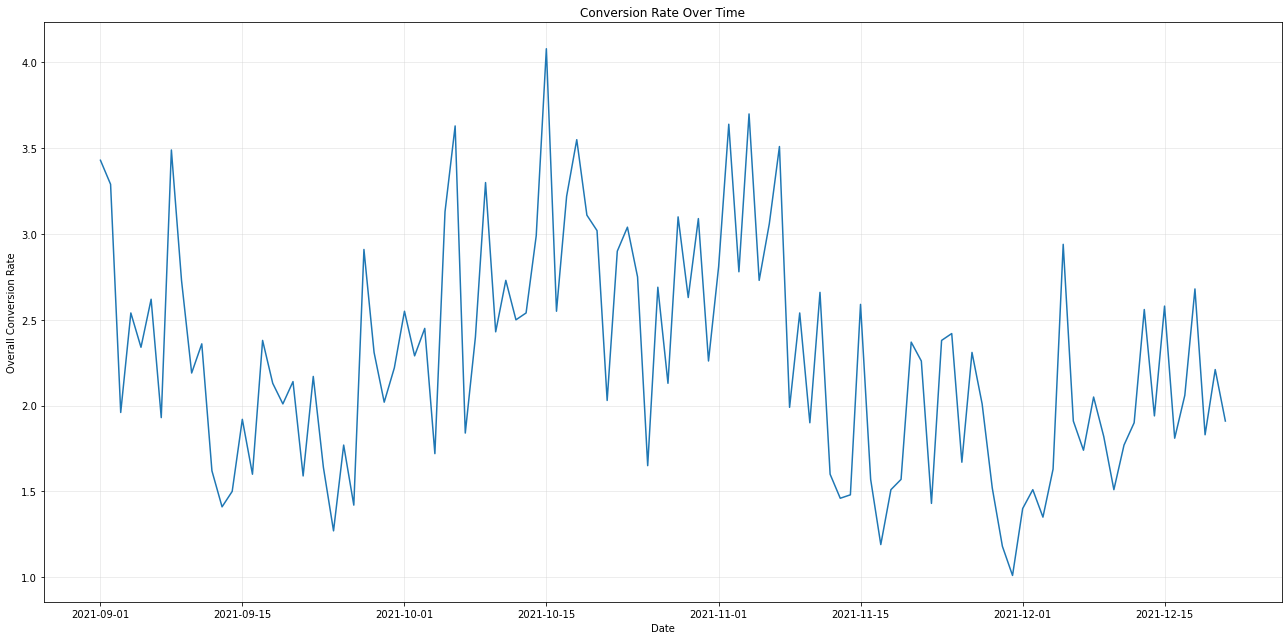

In [22]:
plt.figure(figsize=(18, 9))
plt.plot(df['Date'], df['Overall Conv'])
plt.xlabel('Date')
plt.ylabel('Overall Conversion Rate')
plt.title('Conversion Rate Over Time')

plt.tight_layout()
plt.grid(color='lightgray', alpha=0.5, zorder=1)
plt.show()

In [23]:
data=df

In [24]:
data = data.set_index('Date')  # Set 'date' column as the index
data = data.loc['2021-09-01':'2021-12-21']

In [26]:
stl_result = STL(data['Overall Conv'], seasonal=3).fit()
## seasonal = 3 because of the weekly observation of trend, residual and seasonal

In [27]:
trend = stl_result.trend
seasonal = stl_result.seasonal
residual = stl_result.resid

In [28]:
print(trend)

Date
2021-09-01    2.872016
2021-09-02    2.800722
2021-09-03    2.729408
2021-09-04    2.658154
2021-09-05    2.587060
                ...   
2021-12-17    2.180481
2021-12-18    2.213215
2021-12-19    2.245894
2021-12-20    2.278518
2021-12-21    2.311087
Name: trend, Length: 112, dtype: float64


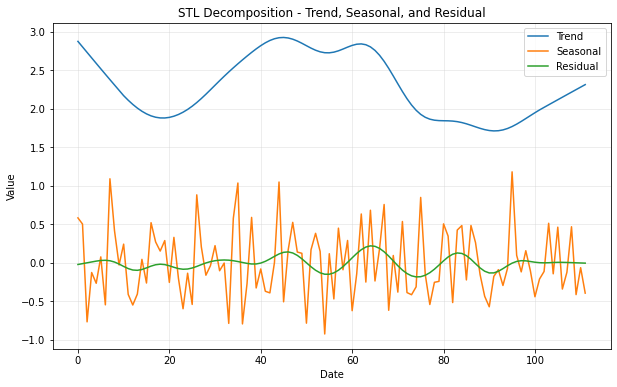

In [30]:
# Plotting the components
plt.figure(figsize=(10, 6))
plt.plot(df.index, trend, label='Trend')
plt.plot(df.index, seasonal, label='Seasonal')
plt.plot(df.index, residual, label='Residual')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('STL Decomposition - Trend, Seasonal, and Residual')
plt.legend()
plt.grid(color='lightgray', alpha=0.5, zorder=1)
# Display the plot
plt.show()

In [31]:
stl_result1 = STL(data['Overall Conv'], seasonal=13).fit()

In [32]:
trend_ = stl_result1.trend
seasonal_ = stl_result1.seasonal
residual_= stl_result1.resid

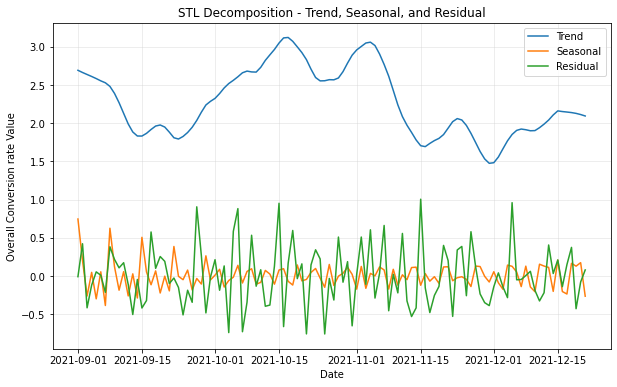

In [33]:
# Plotting the components
plt.figure(figsize=(10, 6))
plt.plot(data.index, trend_, label='Trend')
plt.plot(data.index, seasonal_, label='Seasonal')
plt.plot(data.index, residual_, label='Residual')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Overall Conversion rate Value')
plt.title('STL Decomposition - Trend, Seasonal, and Residual')
plt.legend()
plt.grid(color='lightgray', alpha=0.5, zorder=1)
# Display the plot
plt.show()

C:\Users\LENOVO-PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


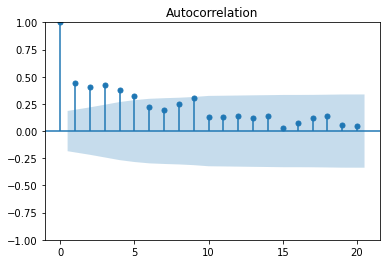

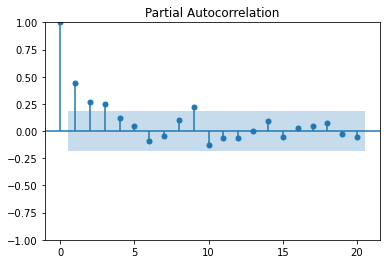

In [35]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

# Calculate the ACF and PACF
acf = plot_acf(df['Overall Conv'], lags=20)
pacf = plot_pacf(df['Overall Conv'], lags=20)

# Display the plots
plt.show()

In [36]:
model = ARIMA(residual, order=(1, 0, 1))  
model_fit = model.fit()
##Initial differencing order, d=0

C:\Users\LENOVO-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO-PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [39]:
forecast_length = 20  
forecast = model_fit.forecast(steps=forecast_length)


In [40]:
print(forecast)

2021-12-22   -0.007313
2021-12-23   -0.007426
2021-12-24   -0.007532
2021-12-25   -0.007631
2021-12-26   -0.007724
2021-12-27   -0.007810
2021-12-28   -0.007892
2021-12-29   -0.007968
2021-12-30   -0.008039
2021-12-31   -0.008105
2022-01-01   -0.008168
2022-01-02   -0.008226
2022-01-03   -0.008281
2022-01-04   -0.008332
2022-01-05   -0.008380
2022-01-06   -0.008425
2022-01-07   -0.008467
2022-01-08   -0.008506
2022-01-09   -0.008543
2022-01-10   -0.008577
Freq: D, Name: predicted_mean, dtype: float64


In [42]:
forecast_df = pd.DataFrame({'Date': forecast_dates,
                            'Trend': trend[-forecast_length:].values,
                            'Seasonal': seasonal[-forecast_length:].values,
                            'Residual': forecast,
                            'Overall Conv': trend[-forecast_length:].values + seasonal[-forecast_length:].values + forecast})


In [43]:
print(forecast_df)

                 Date     Trend  Seasonal  Residual  Overall Conv
2021-12-22 2021-12-31  1.712695 -0.091132 -0.007313      1.614250
2021-12-23 2022-01-31  1.723216 -0.295807 -0.007426      1.419984
2021-12-24 2022-02-28  1.741617 -0.072280 -0.007532      1.661805
2021-12-25 2022-03-31  1.767077  1.179000 -0.007631      2.938447
2021-12-26 2022-04-30  1.798241  0.095308 -0.007724      1.885825
2021-12-27 2022-05-31  1.833410 -0.119299 -0.007810      1.706300
2021-12-28 2022-06-30  1.870802  0.155338 -0.007892      2.018248
2021-12-29 2022-07-31  1.908818 -0.104097 -0.007968      1.796754
2021-12-30 2022-08-31  1.946259 -0.442288 -0.008039      1.495932
2021-12-31 2022-09-30  1.982441 -0.212329 -0.008105      1.762006
2022-01-01 2022-10-31  2.015849 -0.113912 -0.008168      1.893770
2022-01-02 2022-11-30  2.048949  0.511428 -0.008226      2.552151
2022-01-03 2022-12-31  2.081937 -0.144396 -0.008281      1.929261
2022-01-04 2023-01-31  2.114848  0.460795 -0.008332      2.567310
2022-01-05

In [45]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity using ADF test
adf_result = adfuller(data['Overall Conv'])
p_value = adf_result[1]

In [46]:
p_value

0.34262460475293943

In [48]:
##Initial difference assumed stationarity
d=0

# Perform differencing until stationarity is achieved
while p_value > 0.05:
    data['differenced'] = data['Overall Conv'].diff()
    data.dropna(inplace=True)
    adf_result = adfuller(data['differenced'])
    p_value = adf_result[1]
    d += 1



In [49]:
# Print the final differencing order
print("Differencing order (d):", d)

Differencing order (d): 0


In [50]:
forecast_df.to_csv('ARIMA_forecast.csv')